In [1]:
from matplotlib import pyplot, cm
from math import pi
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
nx = 41
ny = 41

l = 1.
h = 1.

dx = l/(nx-1)
dy = h/(ny-1)

x = numpy.linspace(0,1,nx)
y = numpy.linspace(0,1,ny)

l1_target = 1e-6

In [3]:
def L1norm(new, old):
    norm = numpy.sum(numpy.abs(new-old))
    return norm

In [4]:
omega = numpy.zeros((ny,nx)) 
psi = numpy.zeros((ny,nx)) 

In [5]:
def cavity(omega, psi, dx, dy, ll_target):
    l1norm_psi = 1
    l1norm_omega = 1
    omega_n = numpy.empty_like(omega)
    psi_n = numpy.empty_like(psi)
    
    
    while l1norm_psi > l1_target or l1norm_omega > l1_target:
        omega_n = omega.copy()
        psi_n = psi.copy()
        
        #Poisson equation
        psi[1:-1,1:-1] = 1./(2*(dx**2 + dy**2)) * ((psi_n[1:-1,2:]+psi_n[1:-1,:-2])*dy**2 +\
                        (psi_n[2:,1:-1] + psi_n[:-2,1:-1])*dx**2 + omega[1:-1,1:-1]*dx**2*dy**2)
        
        # BCs of psi are automatically enforced
        l1norm_psi = L1norm(psi_n, psi)
        
        #Laplace
        omega[1:-1,1:-1] = .25 * (omega_n[1:-1,2:] + omega_n[1:-1, :-2] + omega_n[2:, 1:-1] + omega_n[:-2, 1:-1])
        uj =1
        
        #Neumann boundary
        #top
        omega[-1, 1:-1] = (-1./(2.*dy**2)*((8.*psi[-2, 1:-1]) - psi[-3, 1:-1])) - ((3. * uj) / dy)
        #bottom
        omega[0, 1:-1] = (-1./(2.*dy**2)*((8.*psi[1, 1:-1]) - psi[2, 1:-1]))
        #left
        omega[1:-1, 0] = (-1./(2.*dx**2)*((8.*psi[1:-1, 1]) - psi[1:-1, 2]))
        #right
        omega[1:-1, -1] = (-1./(2.*dx**2)*((8.*psi[1:-1, -2]) - psi[1:-1, -3]))
      
        
        
        l1norm_omega = L1norm(omega_n, omega)
                             
    return omega, psi

In [6]:
Ans = cavity(omega.copy(), psi.copy(), dx, dy, l1_target)

In [7]:
psi=Ans[1]
omega = Ans[0]

In [8]:
psi

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   1.41429633e-06,   2.17360372e-06, ...,
          2.17360372e-06,   1.41429633e-06,   0.00000000e+00],
       [  0.00000000e+00,   2.20482440e-06,   1.45898838e-07, ...,
          1.45898838e-07,   2.20482440e-06,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,  -6.35061518e-03,  -1.52288240e-02, ...,
         -1.52288240e-02,  -6.35061518e-03,   0.00000000e+00],
       [  0.00000000e+00,  -7.32622358e-03,  -1.33638594e-02, ...,
         -1.33638594e-02,  -7.32622358e-03,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [9]:
omega

array([[  0.00000000e+00,  -7.28763699e-03,  -1.37943448e-02, ...,
         -1.37943448e-02,  -7.28763699e-03,   0.00000000e+00],
       [ -7.31261353e-03,   2.04601149e-03,   1.14128837e-02, ...,
          1.14128837e-02,   2.04601149e-03,  -7.31261353e-03],
       [ -1.39941571e-02,   1.13714128e-02,   3.23148136e-02, ...,
          3.23148136e-02,   1.13714128e-02,  -1.39941571e-02],
       ..., 
       [  2.84608780e+01,   3.17800898e+00,  -7.89273450e+00, ...,
         -7.89273450e+00,   3.17800898e+00,   2.84608780e+01],
       [  3.61967434e+01,  -1.53446715e+01,  -2.25607772e+01, ...,
         -2.25607772e+01,  -1.53446715e+01,   3.61967434e+01],
       [  0.00000000e+00,  -7.81926612e+01,  -4.66543587e+01, ...,
         -4.66543587e+01,  -7.81926612e+01,   0.00000000e+00]])

In [10]:
max_psi = numpy.absolute(psi).max()

In [11]:
print('The max value of |psi| is {:.4f}'.format(max_psi))


The max value of |psi| is 0.0998


In [12]:
max_omega = numpy.absolute(omega).max()

In [13]:
print('The max value of |omega| is {:.4f}'.format(max_omega))

The max value of |omega| is 78.1927


In [14]:
numpy.round(psi[32,::8], 4)

array([ 0.    , -0.0575, -0.0944, -0.0944, -0.0575,  0.    ])

In [15]:
mx, my = numpy.meshgrid(x,y)

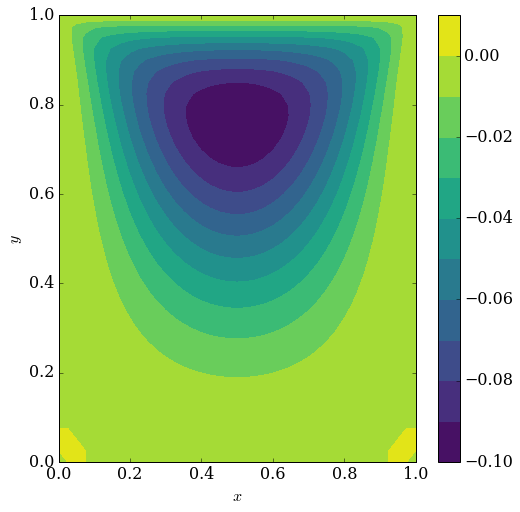

In [16]:
pyplot.figure(figsize=(8,8))
pyplot.contourf(mx,my,psi,10, cmap=cm.viridis)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();